<a href="https://colab.research.google.com/github/Dharshini-SS/100-days-of-code/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls

sample_data/


In [ ]:
cd /content/drive/MyDrive/Flowers-Dataset/

/content/drive/MyDrive/Flowers-Dataset


In [ ]:
pwd

'/content/drive/MyDrive/Flowers-Dataset'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255 , zoom_range = 0.2 , horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = "/content/drive/MyDrive/Flowers-Dataset/flowers"

In [ ]:
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/Flowers-Dataset/flowers',ratio=(.8,0,.2),group_prefix=None)

Copying files: 4317 files [00:53, 80.87 files/s]


In [ ]:
x_test=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers/train" , target_size=(64,64),class_mode="categorical",batch_size=20)

Found 3452 images belonging to 5 classes.


In [ ]:
x_train = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers/test" , target_size=(64,64),class_mode="categorical",batch_size=24)

Found 865 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

MODEL CREATION

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(5,activation='softmax'))

COMPILE THE MODEL

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
len(x_train)
len(x_test)

173

In [ ]:
1238/24

51.583333333333336

In [ ]:
326/24

13.583333333333334

FIT THE MODEL

In [ ]:
model.fit(x_test,epochs= 3,validation_data=x_test, steps_per_epoch=len(x_test),validation_steps=len(x_test))

Epoch 1/3
173/173 [==============================] - 54s 311ms/step - loss: 1.3971 - accuracy: 0.3662 - val_loss: 1.2521 - val_accuracy: 0.4114
Epoch 2/3
173/173 [==============================] - 55s 316ms/step - loss: 1.2167 - accuracy: 0.4655 - val_loss: 1.1411 - val_accuracy: 0.5261
Epoch 3/3
173/173 [==============================] - 53s 309ms/step - loss: 1.1466 - accuracy: 0.5145 - val_loss: 1.1085 - val_accuracy: 0.5417


SAVE THE MODEL

In [ ]:
model.save("flowers.h5")

TEST THE MODEL

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("/content/drive/MyDrive/Flowers-Dataset/flowers.h5")

In [ ]:
img = image.load_img("/content/drive/MyDrive/Flowers-Dataset/flowers/tulip/10164073235_f29931d91e.jpg",target_size=(256,256))

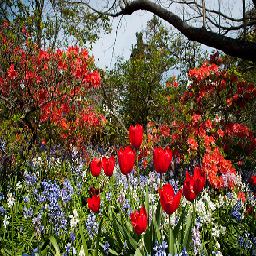

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[ 53.,  98., 119.],
        [ 41.,  46.,  16.],
        [ 13.,  21.,   6.],
        ...,
        [ 16.,   8.,  19.],
        [  3.,   2.,   0.],
        [  6.,   2.,   1.]],

       [[ 37.,  54.,  44.],
        [ 77.,  94.,  88.],
        [ 30.,  37.,   6.],
        ...,
        [  8.,   9.,  11.],
        [  3.,   3.,   1.],
        [  2.,   2.,   2.]],

       [[ 51.,  66.,  85.],
        [  0.,  29.,  37.],
        [  7.,   7.,   0.],
        ...,
        [ 12.,   1.,   7.],
        [  5.,   4.,   2.],
        [  4.,   6.,   1.]],

       ...,

       [[ 44.,  64.,   3.],
        [ 23.,  30.,   0.],
        [ 99., 121.,  23.],
        ...,
        [ 38.,  57.,  87.],
        [ 40.,  61.,  62.],
        [ 55.,  68.,  85.]],

       [[  1.,   0.,   6.],
        [ 11.,  27.,   1.],
        [ 50.,  47.,   0.],
        ...,
        [ 29.,  39.,  48.],
        [ 54.,  50.,  85.],
        [ 95., 105.,  68.]],

       [[ 21.,  40.,  18.],
        [ 16.,  30.,   0.],
        [ 39.,  

In [ ]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 53.,  98., 119.],
         [ 41.,  46.,  16.],
         [ 13.,  21.,   6.],
         ...,
         [ 16.,   8.,  19.],
         [  3.,   2.,   0.],
         [  6.,   2.,   1.]],

        [[ 37.,  54.,  44.],
         [ 77.,  94.,  88.],
         [ 30.,  37.,   6.],
         ...,
         [  8.,   9.,  11.],
         [  3.,   3.,   1.],
         [  2.,   2.,   2.]],

        [[ 51.,  66.,  85.],
         [  0.,  29.,  37.],
         [  7.,   7.,   0.],
         ...,
         [ 12.,   1.,   7.],
         [  5.,   4.,   2.],
         [  4.,   6.,   1.]],

        ...,

        [[ 44.,  64.,   3.],
         [ 23.,  30.,   0.],
         [ 99., 121.,  23.],
         ...,
         [ 38.,  57.,  87.],
         [ 40.,  61.,  62.],
         [ 55.,  68.,  85.]],

        [[  1.,   0.,   6.],
         [ 11.,  27.,   1.],
         [ 50.,  47.,   0.],
         ...,
         [ 29.,  39.,  48.],
         [ 54.,  50.,  85.],
         [ 95., 105.,  68.]],

        [[ 21.,  40.,  18.],
       

In [ ]:
img=image.load_img("/content/drive/MyDrive/Flowers-Dataset/flowers/tulip/10164073235_f29931d91e.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

'tulip'